# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Goal / stating Problem
The goal of this project was to construct a machine learning model aimed at predicting whether a customer would complete an offer provided by the Starbucks rewards program. The primary expectation was to assess the influence of demographic factors such as age and gender on the likelihood of a customer successfully completing an offer.

## Objective
The primary objective was to utilize machine learning techniques to analyze customer behavior data from the Starbucks rewards mobile app. The focus was on understanding how various features, particularly age and gender, contribute to the successful completion of offers. By developing a predictive model, the aim was to identify patterns in customer behavior and determine which demographic factors might significantly impact offer completion rates.

## Approach
The project involved data preprocessing, exploratory data analysis (EDA), feature engineering, and building a machine learning model. It included the selection of relevant features, handling missing values, encoding categorical variables, and splitting the dataset into training and testing sets. The machine learning model was trained to predict whether a customer would complete an offer based on available demographic and behavioral features.

# Metrics
## Accuracy Score
The accuracy score is a metric used to evaluate the performance of a classification model. It measures the ratio of correctly predicted instances to the total number of instances in the dataset. The accuracy score is calculated by dividing the number of correct predictions by the total number of predictions made by the model.

## F1 Score
The F1 score is a measure that combines both precision and recall into a single value. It is particularly useful when dealing with imbalanced classes. The F1 score is calculated as the harmonic mean of precision and recall. It provides a balance between these two metrics, where higher values indicate better model performance.

Both accuracy score and F1 score are essential metrics in evaluating the effectiveness of a classification model. While accuracy measures the overall correctness of predictions, the F1 score considers the balance between precision and recall, providing a more comprehensive assessment, especially in scenarios where class distribution is uneven.

When interpreting these metrics, it's crucial to consider the specific context of the problem being solved and understand the trade-offs between precision, recall, and overall accuracy to make informed decisions about the model's performance.

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

# Data Collection

In [4]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


% matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

## Inspect Portfolio Dataset

In [5]:
def dataframe_summary(dataframe):
    """
    Function to generate summary information for a DataFrame including head, describe, shape, data types, 
    null value count, and percentage of null values.
    
    Parameters:
    - dataframe: DataFrame for which summary information is required.
    
    Returns:
    - Summary information: head, describe, shape, data types, null value count, and percentage of null values.
    """
    # Display the first few rows using head()
    print("Head:\n", dataframe.head(), "\n")

    # Display summary statistics using describe()
    print("Describe:\n", dataframe.describe(), "\n")

    # Display the shape of the DataFrame
    print("Shape:", dataframe.shape, "\n")

    # Display data types of columns
    print("Data Types:\n", dataframe.dtypes, "\n")

    # Check for null values and display the count of null values for each column using isnull().sum()
    null_value_counts = dataframe.isnull().sum()
    print("Null Value Counts:\n", null_value_counts)

    # Calculate percentage of null values for each column
    total_rows = len(dataframe)
    null_percentage = (null_value_counts / total_rows) * 100
    print("\nPercentage of Null Values:\n", null_percentage)

In [6]:
def display_unique_values(dataframe, column_name):
    """
    Function to display unique values of a specified column in a DataFrame.
    
    Parameters:
    - dataframe: DataFrame containing the column.
    - column_name: Name of the column for which unique values are to be displayed.
    
    Returns:
    - Unique values of the specified column.
    """
    unique_values = dataframe[column_name].unique()
    print(f"Unique values in '{column_name}':\n{unique_values}")

In [7]:
# To always display all columns when calling head() function.
pd.set_option('display.max_columns', None)

In [8]:
dataframe_summary(portfolio)

Head:
                        channels  difficulty  duration  \
0       [email, mobile, social]          10         7   
1  [web, email, mobile, social]          10         5   
2          [web, email, mobile]           0         4   
3          [web, email, mobile]           5         7   
4                  [web, email]          20        10   

                                 id     offer_type  reward  
0  ae264e3637204a6fb9bb56bc8210ddfd           bogo      10  
1  4d5c57ea9a6940dd891ad53e9dbe8da0           bogo      10  
2  3f207df678b143eea3cee63160fa8bed  informational       0  
3  9b98b8c7a33c4b65b9aebfe6a799e6d9           bogo       5  
4  0b1e1539f2cc45b7b9fa7c272da2e1d7       discount       5   

Describe:
        difficulty   duration     reward
count   10.000000  10.000000  10.000000
mean     7.700000   6.500000   4.200000
std      5.831905   2.321398   3.583915
min      0.000000   3.000000   0.000000
25%      5.000000   5.000000   2.000000
50%      8.500000   7.000000   

In [9]:
# Get unique offer types
display_unique_values(portfolio, 'offer_type')

Unique values in 'offer_type':
['bogo' 'informational' 'discount']


## Insepct Profile Dataset

In [10]:
dataframe_summary(profile)

Head:
    age  became_member_on gender                                id    income
0  118          20170212   None  68be06ca386d4c31939f3a4f0e3dd783       NaN
1   55          20170715      F  0610b486422d4921ae7d2bf64640c50b  112000.0
2  118          20180712   None  38fe809add3b4fcf9315a9694bb96ff5       NaN
3   75          20170509      F  78afa995795e4d85b5d9ceeca43f5fef  100000.0
4  118          20170804   None  a03223e636434f42ac4c3df47e8bac43       NaN 

Describe:
                 age  became_member_on         income
count  17000.000000      1.700000e+04   14825.000000
mean      62.531412      2.016703e+07   65404.991568
std       26.738580      1.167750e+04   21598.299410
min       18.000000      2.013073e+07   30000.000000
25%       45.000000      2.016053e+07   49000.000000
50%       58.000000      2.017080e+07   64000.000000
75%       73.000000      2.017123e+07   80000.000000
max      118.000000      2.018073e+07  120000.000000 

Shape: (17000, 5) 

Data Types:
 age         

In [11]:
# Checking for duplicate member. There are no duplicates.
profile.duplicated().sum()

0

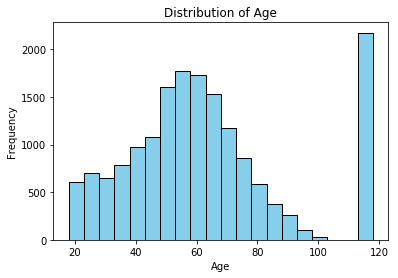

In [12]:
# Show a grafical distribution of age.
plt.hist(profile['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Inspect Transcript Dataset

In [13]:
dataframe_summary(transcript)

Head:
             event                            person  time  \
0  offer received  78afa995795e4d85b5d9ceeca43f5fef     0   
1  offer received  a03223e636434f42ac4c3df47e8bac43     0   
2  offer received  e2127556f4f64592b11af22de27a7932     0   
3  offer received  8ec6ce2a7e7949b1bf142def7d0e0586     0   
4  offer received  68617ca6246f4fbc85e91a2a49552598     0   

                                              value  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}  
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}  
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}  
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}  
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}   

Describe:
                 time
count  306534.000000
mean      366.382940
std       200.326314
min         0.000000
25%       186.000000
50%       408.000000
75%       528.000000
max       714.000000 

Shape: (306534, 4) 

Data Types:
 event     object
person    object
time       int64
value     obj

In [14]:
# Get unique events
display_unique_values(transcript, 'event')

Unique values in 'event':
['offer received' 'offer viewed' 'transaction' 'offer completed']


# Data Preprocessing

In [15]:
def rename_column(dataframe, old_name, new_name):
    """
    Function to rename a column in a DataFrame.
    
    Parameters:
    - dataframe: The DataFrame containing the column to be renamed.
    - old_name: The current name of the column to be renamed.
    - new_name: The new name to assign to the column.
    
    Returns:
    - Updated DataFrame with the column renamed.
    """
    dataframe.rename(columns={old_name: new_name}, inplace=True)
    return dataframe

In [16]:
def convert_column_to_binary(df, column_name):
    """
    Function to convert values in a column (containing lists) into new columns with binary values (0 and 1),
    and drop the original column.
    
    Parameters:
    - df: DataFrame containing the column to be transformed.
    - column_name: Name of the column to be transformed into binary columns (containing lists).
    
    Returns:
    - DataFrame with new binary columns based on each unique value in the specified column (original column dropped).
    """
    # Get unique values from the column's lists
    unique_values = set()
    for row in df[column_name]:
        if isinstance(row, list):  # Check if the entry is a list
            unique_values.update(row)

    # Iterate through each unique value and create new binary columns
    for value in unique_values:
        if pd.notna(value):  # Check for non-finite values (like NaN)
            # Create a new column based on the unique value
            new_column_name = f"{value}"

            # Create a new column filled with 1s where the original column lists contain the unique value, 0s otherwise
            df[new_column_name] = df.apply(lambda x: 1 if isinstance(x[column_name], list) and value in x[column_name] else 0, axis=1)

    # Drop the original column containing lists
    df.drop(columns=[column_name], inplace=True)

    return df

In [17]:
def convert_column_to_binary_with_dummies_int64(df, column_name):
    """
    Function to convert values in a column into binary columns using Pandas get_dummies() function
    and cast the resulting columns to int64.
    
    Parameters:
    - df: DataFrame containing the column to be transformed.
    - column_name: Name of the column to be transformed into binary columns.
    
    Returns:
    - DataFrame with new binary columns based on each unique value in the specified column cast to int64.
    """
    # Use get_dummies to convert the column into binary columns without a prefix
    df_dummies = pd.get_dummies(df[column_name], prefix=None)
    
    # Cast the resulting columns to int64
    df_dummies = df_dummies.astype('int64')

    # Concatenate the binary columns to the original DataFrame
    df = pd.concat([df, df_dummies], axis=1)

    # Drop the original column
    df.drop(columns=[column_name], inplace=True)

    return df

In [18]:
def replace_blanks_with_underscore(df, column_name):
    """
    Function to replace blank spaces with underscores in a specified column of a DataFrame.
    
    Parameters:
    - df: DataFrame containing the column to be modified.
    - column_name: Name of the column where blank spaces will be replaced with underscores.
    
    Returns:
    - DataFrame with blanks replaced by underscores in the specified column.
    """
    # Replace blank spaces with underscores in the specified column
    df[column_name] = df[column_name].str.replace(' ', '_')

    return df

## Portfolio Dataset

In [19]:
# Rename the 'id' column to 'offer_id'
portfolio = rename_column(portfolio, 'id', 'offer_id')
portfolio.head(1)

,channels,difficulty,duration,offer_id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10


In [20]:
portfolio = convert_column_to_binary(portfolio, 'channels')

portfolio.head(1)

,difficulty,duration,offer_id,offer_type,reward,social,web,mobile,email
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,0,1,1


In [21]:
# Check for the datatypes
print(portfolio.dtypes)

difficulty     int64
duration       int64
offer_id      object
offer_type    object
reward         int64
social         int64
web            int64
mobile         int64
email          int64
dtype: object


## Profile Dataset

In [22]:
# As seen. In the age column are many null-values. They are encoded with 118.
# I'll drop the values.
# Dropping rows with '118' encoded as null values in 'age' column
profile = profile[(profile['age'] != 118)]

# Resetting the index after dropping rows
profile.reset_index(drop=True, inplace=True)

# Displaying the updated DataFrame shape after dropping rows
print("Shape of Updated DataFrame after Dropping Rows:", profile.shape)

Shape of Updated DataFrame after Dropping Rows: (14825, 5)


In [23]:
profile.head(1)

,age,became_member_on,gender,id,income
0,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0


In [24]:
# Rename the 'id' column to 'customer_id'
profile = rename_column(profile, 'id', 'customer_id')
profile.head(1)

,age,became_member_on,gender,customer_id,income
0,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0


In [25]:
# Convert 'became_member_on' to date format
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')
profile.head(1)

,age,became_member_on,gender,customer_id,income
0,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0


In [26]:
# Calculate membership duration in days from the membership start date till today
today_date = datetime.today().date()  # Get the current date
profile['membership_duration'] = (today_date - profile['became_member_on'].dt.date).dt.days
profile.head(1)

,age,became_member_on,gender,customer_id,income,membership_duration
0,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2327


In [27]:
# Check for NaN values
profile.isnull().sum()

age                    0
became_member_on       0
gender                 0
customer_id            0
income                 0
membership_duration    0
dtype: int64

In [28]:
# Check the datatypes
profile.dtypes

age                             int64
became_member_on       datetime64[ns]
gender                         object
customer_id                    object
income                        float64
membership_duration             int64
dtype: object

## Transcript Dataset

In [29]:
transcript.head(1)

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}


In [30]:
# Rename the 'person' column to 'customer_id'
transcript.rename(columns={'person': 'customer_id'}, inplace=True)
transcript.head(1)

,event,customer_id,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}


In [31]:
transcript = replace_blanks_with_underscore(transcript, 'event')

In [32]:
transcript.dtypes

event          object
customer_id    object
time            int64
value          object
dtype: object

In [33]:
transcript.head()

,event,customer_id,time,value
0,offer_received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer_received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer_received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer_received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer_received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [34]:
# Convert 'event' into binary columns
transcript = convert_column_to_binary_with_dummies_int64(transcript, 'event')

transcript.head(1)

,customer_id,time,value,offer_completed,offer_received,offer_viewed,transaction
0,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,1,0,0


In [35]:
# Separating the 'value' column
# Extract 'amount', 'offer_id, and 'reward' from the 'value' column into separate columns
transcript['amount'] = transcript['value'].apply(lambda x: x.get('amount'))
transcript['offer_id'] = transcript['value'].apply(lambda x: x.get('offer_id') if 'offer_id' in x else x.get('offer id'))
transcript['rewards'] = transcript['value'].apply(lambda x: x.get('reward'))

# Drop the original 'value' column
transcript.drop(columns=['value'], inplace=True)

# Display the updated DataFrame with the new columns
transcript.head()

,customer_id,time,offer_completed,offer_received,offer_viewed,transaction,amount,offer_id,rewards
0,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,a03223e636434f42ac4c3df47e8bac43,0,0,1,0,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,e2127556f4f64592b11af22de27a7932,0,0,1,0,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,0,1,0,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,68617ca6246f4fbc85e91a2a49552598,0,0,1,0,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


In [36]:
transcript.dtypes

customer_id         object
time                 int64
offer_completed      int64
offer_received       int64
offer_viewed         int64
transaction          int64
amount             float64
offer_id            object
rewards            float64
dtype: object

In [37]:
# handle the duplicates
transcript.duplicated().sum()

397

In [38]:
transcript.drop_duplicates(inplace = True)

In [39]:
transcript.duplicated().sum()

0

In [40]:
# Filtering the DataFrame for rows where the 'time' attribute is zero
zero_time_records = transcript[transcript['time'] == 0]

# Summing up the records where the 'time' attribute is zero
sum_zero_time_records = zero_time_records.sum()

# Displaying the sum of records where 'time' is zero
print(sum_zero_time_records)

# Finding the maximum value in the 'time' column
max_time = transcript['time'].max()

# Displaying the maximum value of 'time'
print("Maximum value of 'time':", max_time)


customer_id        78afa995795e4d85b5d9ceeca43f5fefa03223e636434f...
time                                                               0
offer_completed                                                  206
offer_received                                                 12650
offer_viewed                                                    2072
transaction                                                      633
amount                                                       7305.57
rewards                                                         1092
dtype: object
Maximum value of 'time': 714


## Merge datasets

In [41]:
def merge_dataframes(df1, df2, on_column, how='left'):
    """
    Function to merge two DataFrames based on a specified column and merge type.
    
    Parameters:
    - df1: First DataFrame to be merged.
    - df2: Second DataFrame to be merged.
    - on_column: Column name on which the DataFrames will be merged.
    - how: Type of merge (default is 'left').
    
    Returns:
    - Merged DataFrame.
    """
    merged_df = pd.merge(df1, df2, on=on_column, how=how)
    return merged_df

In [42]:
def handle_nan_and_convert_to_int(dataframe, columns):
    """
    Function to handle NaN values in specified columns by replacing them with 0 and converting the columns to integers.
    
    Parameters:
    - dataframe: DataFrame in which columns need NaN handling and conversion.
    - columns: List of column names to handle NaN and convert to integers.
    
    Returns:
    - DataFrame with specified columns processed.
    """
    for column in columns:
        dataframe[column] = dataframe[column].fillna(0).astype(int)
    return dataframe

In [43]:
print(profile.dtypes)
print()
print(portfolio.dtypes)
print()
print(transcript.dtypes)

age                             int64
became_member_on       datetime64[ns]
gender                         object
customer_id                    object
income                        float64
membership_duration             int64
dtype: object

difficulty     int64
duration       int64
offer_id      object
offer_type    object
reward         int64
social         int64
web            int64
mobile         int64
email          int64
dtype: object

customer_id         object
time                 int64
offer_completed      int64
offer_received       int64
offer_viewed         int64
transaction          int64
amount             float64
offer_id            object
rewards            float64
dtype: object


In [44]:
# Call the function to merge the DataFrames
transcript_profile = merge_dataframes(transcript, profile, 'customer_id', 'left')
df = merge_dataframes(transcript_profile, portfolio, 'offer_id', 'left')

# Display information about the data types of the merged DataFrame
print(df.dtypes)

customer_id                    object
time                            int64
offer_completed                 int64
offer_received                  int64
offer_viewed                    int64
transaction                     int64
amount                        float64
offer_id                       object
rewards                       float64
age                           float64
became_member_on       datetime64[ns]
gender                         object
income                        float64
membership_duration           float64
difficulty                    float64
duration                      float64
offer_type                     object
reward                        float64
social                        float64
web                           float64
mobile                        float64
email                         float64
dtype: object


In [45]:
# Call the function to handle NaN values and convert columns to integers
processed_df = handle_nan_and_convert_to_int(df, ['web', 'mobile', 'email', 'social'])

print(df.dtypes)

customer_id                    object
time                            int64
offer_completed                 int64
offer_received                  int64
offer_viewed                    int64
transaction                     int64
amount                        float64
offer_id                       object
rewards                       float64
age                           float64
became_member_on       datetime64[ns]
gender                         object
income                        float64
membership_duration           float64
difficulty                    float64
duration                      float64
offer_type                     object
reward                        float64
social                          int64
web                             int64
mobile                          int64
email                           int64
dtype: object


In [46]:
df.head()

,customer_id,time,offer_completed,offer_received,offer_viewed,transaction,amount,offer_id,rewards,age,became_member_on,gender,income,membership_duration,difficulty,duration,offer_type,reward,social,web,mobile,email
0,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,75.0,2017-05-09,F,100000.0,2394.0,5.0,7.0,bogo,5.0,0,1,1,1
1,a03223e636434f42ac4c3df47e8bac43,0,0,1,0,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,NaT,NaN,NaN,NaN,20.0,10.0,discount,5.0,0,1,0,1
2,e2127556f4f64592b11af22de27a7932,0,0,1,0,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,68.0,2018-04-26,M,70000.0,2042.0,10.0,7.0,discount,2.0,0,1,1,1
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,0,1,0,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,NaT,NaN,NaN,NaN,10.0,10.0,discount,2.0,1,1,1,1
4,68617ca6246f4fbc85e91a2a49552598,0,0,1,0,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,NaT,NaN,NaN,NaN,10.0,5.0,bogo,10.0,1,1,1,1


In [47]:
dataframe_summary(df)

Head:
                         customer_id  time  offer_completed  offer_received  \
0  78afa995795e4d85b5d9ceeca43f5fef     0                0               1   
1  a03223e636434f42ac4c3df47e8bac43     0                0               1   
2  e2127556f4f64592b11af22de27a7932     0                0               1   
3  8ec6ce2a7e7949b1bf142def7d0e0586     0                0               1   
4  68617ca6246f4fbc85e91a2a49552598     0                0               1   

   offer_viewed  transaction  amount                          offer_id  \
0             0            0     NaN  9b98b8c7a33c4b65b9aebfe6a799e6d9   
1             0            0     NaN  0b1e1539f2cc45b7b9fa7c272da2e1d7   
2             0            0     NaN  2906b810c7d4411798c6938adc9daaa5   
3             0            0     NaN  fafdcd668e3743c1bb461111dcafc2a4   
4             0            0     NaN  4d5c57ea9a6940dd891ad53e9dbe8da0   

   rewards   age became_member_on gender    income  membership_duration  \
0   

# Explanatory Data Analysis

In [48]:
df.head(10)

,customer_id,time,offer_completed,offer_received,offer_viewed,transaction,amount,offer_id,rewards,age,became_member_on,gender,income,membership_duration,difficulty,duration,offer_type,reward,social,web,mobile,email
0,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,75.0,2017-05-09,F,100000.0,2394.0,5.0,7.0,bogo,5.0,0,1,1,1
1,a03223e636434f42ac4c3df47e8bac43,0,0,1,0,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,NaT,NaN,NaN,NaN,20.0,10.0,discount,5.0,0,1,0,1
2,e2127556f4f64592b11af22de27a7932,0,0,1,0,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,68.0,2018-04-26,M,70000.0,2042.0,10.0,7.0,discount,2.0,0,1,1,1
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,0,1,0,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,NaT,NaN,NaN,NaN,10.0,10.0,discount,2.0,1,1,1,1
4,68617ca6246f4fbc85e91a2a49552598,0,0,1,0,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,NaT,NaN,NaN,NaN,10.0,5.0,bogo,10.0,1,1,1,1
5,389bc3fa690240e798340f5a15918d5c,0,0,1,0,0,NaN,f19421c1d4aa40978ebb69ca19b0e20d,NaN,65.0,2018-02-09,M,53000.0,2118.0,5.0,5.0,bogo,5.0,1,1,1,1
6,c4863c7985cf408faee930f111475da3,0,0,1,0,0,NaN,2298d6c36e964ae4a3e7e9706d1fb8c2,NaN,NaN,NaT,NaN,NaN,NaN,7.0,7.0,discount,3.0,1,1,1,1
7,2eeac8d8feae4a8cad5a6af0499a211d,0,0,1,0,0,NaN,3f207df678b143eea3cee63160fa8bed,NaN,58.0,2017-11-11,M,51000.0,2208.0,0.0,4.0,informational,0.0,0,1,1,1
8,aa4862eba776480b8bb9c68455b8c2e1,0,0,1,0,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,61.0,2017-09-11,F,57000.0,2269.0,20.0,10.0,discount,5.0,0,1,0,1
9,31dda685af34476cad5bc968bdb01c53,0,0,1,0,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,62.0,2016-02-11,F,71000.0,2847.0,20.0,10.0,discount,5.0,0,1,0,1


## General

In [49]:
# Check for the minimum and maximum values in the 'amount' column
min_amount = df['amount'].min()
max_amount = df['amount'].max()
print(min_amount)
print(max_amount)

0.05
1062.28


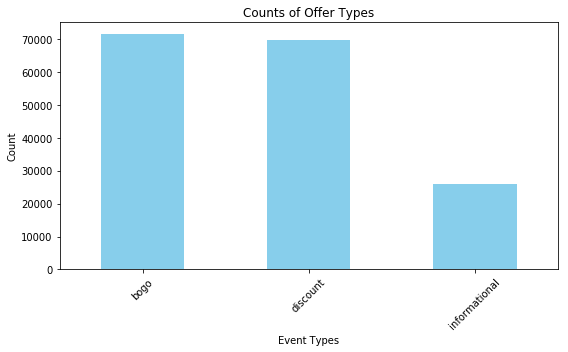

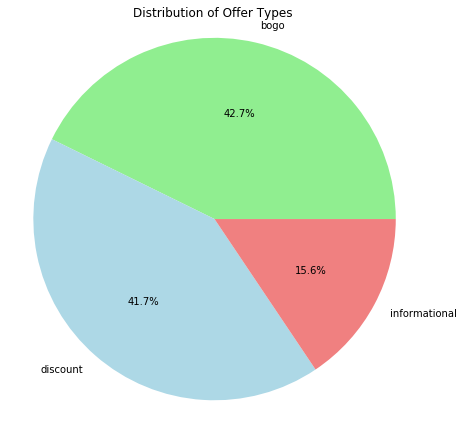

In [50]:
# Calculate the counts of each offer type
offer_type_counts = df['offer_type'].value_counts()

# Bar Plot
plt.figure(figsize=(8, 5))
offer_type_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Offer Types')
plt.xlabel('Event Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(offer_type_counts, labels=offer_type_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightcoral', 'lightskyblue'])
plt.title('Distribution of Offer Types')
plt.axis('equal')
plt.tight_layout()
plt.show()

## Gender

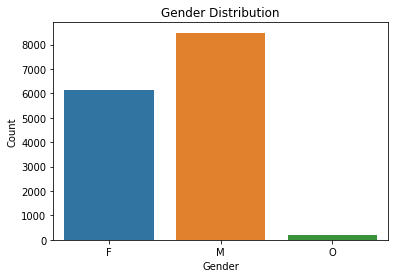

In [51]:
# Plotting the gender distribution using Seaborn's countplot
plt.figure(figsize=(6, 4))
sns.countplot(data=profile, x='gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

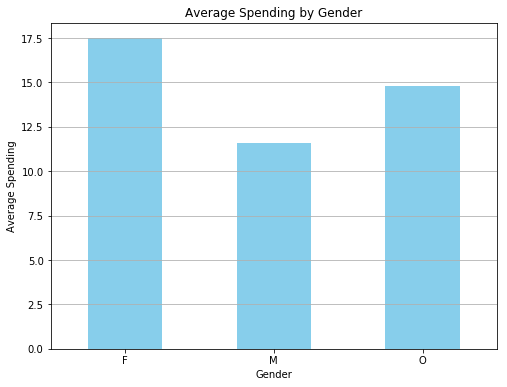

In [52]:
# Grouping the DataFrame by 'gender' and calculating the average spending for each gender
average_spending = df.groupby('gender')['amount'].mean()

# Plotting a bar plot for average spending by gender
plt.figure(figsize=(8, 6))
average_spending.plot(kind='bar', color='skyblue')
plt.title('Average Spending by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Spending')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

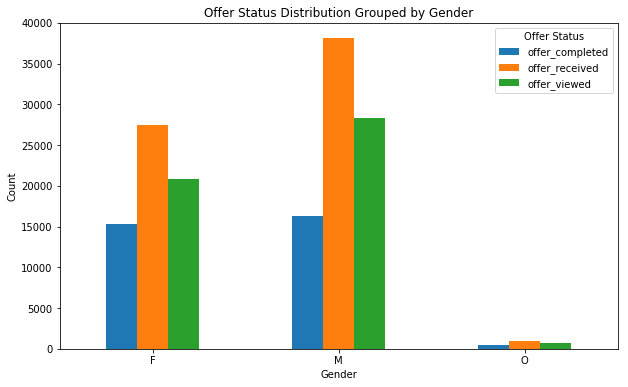

In [53]:
# Group by 'gender' and calculate the sum of offer status columns
grouped_gender = df.groupby('gender')[['offer_completed', 'offer_received', 'offer_viewed']].sum()

# Plot histograms for offer status distribution grouped by gender
grouped_gender.plot(kind='bar', figsize=(10, 6))
plt.title('Offer Status Distribution Grouped by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Offer Status')
plt.show()

In [54]:
# Group by 'gender' and calculate the sum of offer status columns
grouped_gender = df.groupby('gender')[['offer_completed', 'offer_received']].sum()

# Calculate the percentage of completed offers out of received offers
grouped_gender['percentage_completed'] = (grouped_gender['offer_completed'] / grouped_gender['offer_received']) * 100

# Display the percentage of completed offers out of received offers
print(grouped_gender)

        offer_completed  offer_received  percentage_completed
gender                                                       
F                 15316           27456             55.783800
M                 16259           38129             42.642083
O                   495             916             54.039301


## Age

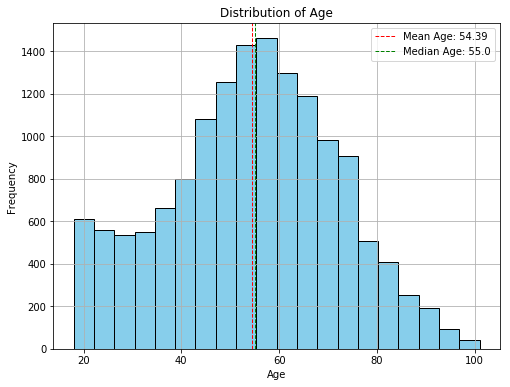

In [55]:
# Calculate mean and median age
mean_age = profile['age'].mean()
median_age = profile['age'].median()

# Display a histogram for the 'age' column with mean and median lines
plt.figure(figsize=(8, 6))
plt.hist(profile['age'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=1, label=f'Mean Age: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=1, label=f'Median Age: {median_age}')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

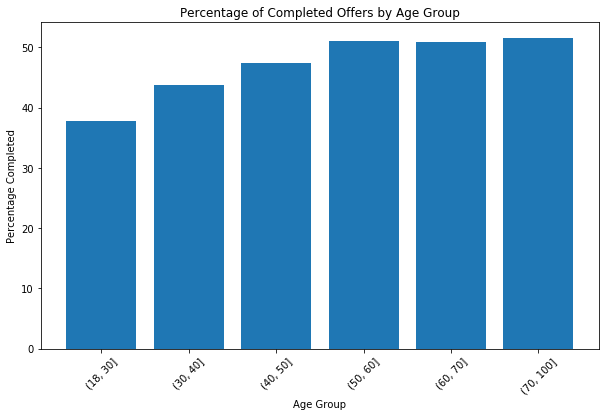

In [56]:
age_bins = [18, 30, 40, 50, 60, 70, 100]  # You can adjust these bins according to your preference

# Create age groups based on defined bins
df['age_group'] = pd.cut(df['age'], bins=age_bins)

# Group by 'age_group' and calculate the sum of offer status columns
grouped_age = df.groupby('age_group')[['offer_completed', 'offer_received']].sum()

# Calculate the percentage of completed offers within each age group
grouped_age['percentage_completed'] = (grouped_age['offer_completed'] / grouped_age['offer_received']) * 100

# Drop rows where 'offer received' count is zero to avoid division by zero
grouped_age = grouped_age[grouped_age['offer_received'] > 0]

# Plotting the percentage of completed offers within each age group
plt.figure(figsize=(10, 6))
plt.bar(grouped_age.index.astype(str), grouped_age['percentage_completed'])
plt.title('Percentage of Completed Offers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage Completed')
plt.xticks(rotation=45)
plt.show()

## Most completed offers

In [57]:
# Group by 'offer_id' and calculate the sum of 'offer completed' for each offer
offer_completion_counts = df[df['offer_completed'] == 1].groupby('offer_id')['offer_completed'].sum()

# Sort the offer completion counts in descending order to find the most completed offers
most_completed_offers = offer_completion_counts.sort_values(ascending=False)

# Display the offer IDs that are completed the most
print("Offer IDs completed the most:")
print(most_completed_offers.head())  # Display the top offer IDs with the highest completion counts


Offer IDs completed the most:
offer_id
fafdcd668e3743c1bb461111dcafc2a4    5265
2298d6c36e964ae4a3e7e9706d1fb8c2    5112
9b98b8c7a33c4b65b9aebfe6a799e6d9    4303
f19421c1d4aa40978ebb69ca19b0e20d    4262
2906b810c7d4411798c6938adc9daaa5    3964
Name: offer_completed, dtype: int64


In [58]:
# Much more possible factors

# Data Preparation for ML Model

## Further Data Preparation

In [59]:
dataframe_summary(df)

Head:
                         customer_id  time  offer_completed  offer_received  \
0  78afa995795e4d85b5d9ceeca43f5fef     0                0               1   
1  a03223e636434f42ac4c3df47e8bac43     0                0               1   
2  e2127556f4f64592b11af22de27a7932     0                0               1   
3  8ec6ce2a7e7949b1bf142def7d0e0586     0                0               1   
4  68617ca6246f4fbc85e91a2a49552598     0                0               1   

   offer_viewed  transaction  amount                          offer_id  \
0             0            0     NaN  9b98b8c7a33c4b65b9aebfe6a799e6d9   
1             0            0     NaN  0b1e1539f2cc45b7b9fa7c272da2e1d7   
2             0            0     NaN  2906b810c7d4411798c6938adc9daaa5   
3             0            0     NaN  fafdcd668e3743c1bb461111dcafc2a4   
4             0            0     NaN  4d5c57ea9a6940dd891ad53e9dbe8da0   

   rewards   age became_member_on gender    income  membership_duration  \
0   

In [60]:
# Create 5 age classes based on quantiles
df['age_class'] = pd.qcut(df['age'], q=5, labels=['Young', 'Adult', 'Middle-aged', 'Senior', 'Elderly'])

# Mapping dictionary for age classes
age_class_mapping = {'Young': 1, 'Adult': 2, 'Middle-aged': 3, 'Senior': 4, 'Elderly': 5}

# Map the age classes to numeric values
df['age_class_encoded'] = df['age_class'].map(age_class_mapping)

# Display the DataFrame with the new 'age_class' column and its encoded values
df[['age', 'age_class', 'age_class_encoded']].head()

,age,age_class,age_class_encoded
0,75.0,Elderly,5.0
1,NaN,NaN,NaN
2,68.0,Senior,4.0
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [61]:
# Create 5 income classes based on quantiles
df['income_class'] = pd.qcut(df['income'], q=5, labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])

# Mapping dictionary for income classes
income_class_mapping = {'Very Low': 1, 'Low': 2, 'Moderate': 3, 'High': 4, 'Very High': 5}

# Map the income classes to numeric values
df['income_class_encoded'] = df['income_class'].map(income_class_mapping)

# Display the DataFrame with the new 'income_class' column and its encoded values
df[['income', 'income_class', 'income_class_encoded']].head()

,income,income_class,income_class_encoded
0,100000.0,Very High,5.0
1,NaN,NaN,NaN
2,70000.0,High,4.0
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [62]:
# Display the 'gender' column
print(df['gender'].head())

0      F
1    NaN
2      M
3    NaN
4    NaN
Name: gender, dtype: object


In [63]:
df.shape

(306137, 27)

In [64]:
# Due to the low percentage I'll drop NaN columns of 'age' bzw. 'gender' column
df = df.dropna(subset=['age'])

# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

In [65]:
df.shape

(272388, 27)

In [66]:
def encode_gender(df):
    """
    Encodes the 'gender' column values to numeric representations.

    Parameters:
    - df: DataFrame to be processed.

    Returns:
    - DataFrame with 'gender' column values encoded to numeric representations.
    """
    # Create a dictionary to map genders to numeric values
    gender_mapping = {'F': 1, 'M': 2, 'O': 3}

    # Create a copy of the DataFrame to avoid the SettingWithCopyWarning
    df_copy = df.copy()

    # Map the gender values to their corresponding numeric values using the dictionary
    df_copy['gender'] = df_copy['gender'].map(gender_mapping).fillna(0).astype(int)

    return df_copy


In [67]:
df = encode_gender(df)
df.head()

,customer_id,time,offer_completed,offer_received,offer_viewed,transaction,amount,offer_id,rewards,age,became_member_on,gender,income,membership_duration,difficulty,duration,offer_type,reward,social,web,mobile,email,age_group,age_class,age_class_encoded,income_class,income_class_encoded
0,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,75.0,2017-05-09,1,100000.0,2394.0,5.0,7.0,bogo,5.0,0,1,1,1,"(70, 100]",Elderly,5.0,Very High,5.0
1,e2127556f4f64592b11af22de27a7932,0,0,1,0,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,68.0,2018-04-26,2,70000.0,2042.0,10.0,7.0,discount,2.0,0,1,1,1,"(60, 70]",Senior,4.0,High,4.0
2,389bc3fa690240e798340f5a15918d5c,0,0,1,0,0,NaN,f19421c1d4aa40978ebb69ca19b0e20d,NaN,65.0,2018-02-09,2,53000.0,2118.0,5.0,5.0,bogo,5.0,1,1,1,1,"(60, 70]",Senior,4.0,Low,2.0
3,2eeac8d8feae4a8cad5a6af0499a211d,0,0,1,0,0,NaN,3f207df678b143eea3cee63160fa8bed,NaN,58.0,2017-11-11,2,51000.0,2208.0,0.0,4.0,informational,0.0,0,1,1,1,"(50, 60]",Middle-aged,3.0,Low,2.0
4,aa4862eba776480b8bb9c68455b8c2e1,0,0,1,0,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,61.0,2017-09-11,1,57000.0,2269.0,20.0,10.0,discount,5.0,0,1,0,1,"(60, 70]",Senior,4.0,Low,2.0


In [68]:
df['year_joined'] = df['became_member_on'].dt.year
df.head()

,customer_id,time,offer_completed,offer_received,offer_viewed,transaction,amount,offer_id,rewards,age,became_member_on,gender,income,membership_duration,difficulty,duration,offer_type,reward,social,web,mobile,email,age_group,age_class,age_class_encoded,income_class,income_class_encoded,year_joined
0,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,75.0,2017-05-09,1,100000.0,2394.0,5.0,7.0,bogo,5.0,0,1,1,1,"(70, 100]",Elderly,5.0,Very High,5.0,2017
1,e2127556f4f64592b11af22de27a7932,0,0,1,0,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,68.0,2018-04-26,2,70000.0,2042.0,10.0,7.0,discount,2.0,0,1,1,1,"(60, 70]",Senior,4.0,High,4.0,2018
2,389bc3fa690240e798340f5a15918d5c,0,0,1,0,0,NaN,f19421c1d4aa40978ebb69ca19b0e20d,NaN,65.0,2018-02-09,2,53000.0,2118.0,5.0,5.0,bogo,5.0,1,1,1,1,"(60, 70]",Senior,4.0,Low,2.0,2018
3,2eeac8d8feae4a8cad5a6af0499a211d,0,0,1,0,0,NaN,3f207df678b143eea3cee63160fa8bed,NaN,58.0,2017-11-11,2,51000.0,2208.0,0.0,4.0,informational,0.0,0,1,1,1,"(50, 60]",Middle-aged,3.0,Low,2.0,2017
4,aa4862eba776480b8bb9c68455b8c2e1,0,0,1,0,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,61.0,2017-09-11,1,57000.0,2269.0,20.0,10.0,discount,5.0,0,1,0,1,"(60, 70]",Senior,4.0,Low,2.0,2017


In [69]:
# Now we still have NaN values in 'age_group' column. Maybe because they couldnt be transmitted. I'll drop 'em.

In [70]:
# Due to the low percentage I'll drop NaN columns of 'age_group'
df = df.dropna(subset=['age_group'])

# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

In [71]:
df.shape

(270926, 28)

In [72]:
# Now we still can see that in the amount and reward column are many null-values. I assume that there is no money spent ir earbed. So i fill them with 0.
df['amount'].fillna(0, inplace=True)
df['reward'].fillna(0, inplace=True)

In [73]:
# Now we can go on with this clean dataset
# First let's create a subset with the for me relevant feature variables
df_prep = df[['time', 'amount', 'offer_completed', 'reward', 'age', 'income', 'gender', 'year_joined']]

dataframe_summary(df_prep)

Head:
    time  amount  offer_completed  reward   age    income  gender  year_joined
0     0     0.0                0     5.0  75.0  100000.0       1         2017
1     0     0.0                0     2.0  68.0   70000.0       2         2018
2     0     0.0                0     5.0  65.0   53000.0       2         2018
3     0     0.0                0     0.0  58.0   51000.0       2         2017
4     0     0.0                0     5.0  61.0   57000.0       1         2017 

Describe:
                 time         amount  offer_completed         reward  \
count  270926.000000  270926.000000    270926.000000  270926.000000   
mean      366.490208       6.379720         0.117862       2.422086   
std       200.362459      22.538371         0.322446       3.331640   
min         0.000000       0.000000         0.000000       0.000000   
25%       186.000000       0.000000         0.000000       0.000000   
50%       408.000000       0.000000         0.000000       0.000000   
75%       528.0

## Split the Data

In [74]:
X = df_prep[['time', 'amount', 'reward', 'age', 'income', 'gender', 'year_joined']]
y =  df_prep['offer_completed']

## Train the model

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


# Modelling

In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
import time
from sklearn.metrics import accuracy_score, f1_score

## Decision Tree Classifier

In [77]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier using the training data
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy:.2f}")

# Handling imbalance: Resampling the data (for example, upsampling the minority class)
# Upsample the minority class in the training set if needed
X_train_resampled, y_train_resampled = resample(X_train[y_train == 1], y_train[y_train == 1],
                                               replace=True, n_samples=X_train[y_train == 0].shape[0],
                                               random_state=42)
X_train_balanced = pd.concat([X_train[y_train == 0], X_train_resampled])
y_train_balanced = pd.concat([y_train[y_train == 0], y_train_resampled])

# Retrain the classifier using the balanced training data
clf_balanced = DecisionTreeClassifier(random_state=42)
clf_balanced.fit(X_train_balanced, y_train_balanced)

# Predict on the test set with the balanced classifier
y_pred_balanced = clf_balanced.predict(X_test)

# Calculate the accuracy of the balanced model
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
print(f"Accuracy of the balanced model: {accuracy_balanced:.2f}")

# Show classification report for the balanced model
print("Classification Report for the balanced model:")
print(classification_report(y_test, y_pred_balanced))


Accuracy of the model: 0.87
Accuracy of the balanced model: 0.87
Classification Report for the balanced model:
             precision    recall  f1-score   support

          0       0.93      0.92      0.92     59711
          1       0.44      0.47      0.46      8021

avg / total       0.87      0.87      0.87     67732



### Grid Search on Decision Tree Classifier

#### Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#### Initialize GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5)

#### Perform grid search on your data
grid_search.fit(X, y)

#### Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

#### Get the best estimator/model
best_clf = grid_search.best_estimator_

#### Fit the best model on your data
best_clf.fit(X_train, y_train)

#### Predict using the best model
y_pred = best_clf.predict(X_test)

#### Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

#### Report
Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Classification Report:

             precision    recall  f1-score   support

          0       0.89      0.99      0.94     59711
          1       0.65      0.11      0.19      8021

avg / total       0.86      0.89      0.85     67732


### Cross Validation on Decision Tree Classifier

In [78]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=2)

# Perform cross-validation and print the scores
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Average accuracy:", cv_scores.mean())

Cross-validation scores: [ 0.88212823  0.88212823  0.8821445   0.8821445   0.70284586]
Average accuracy: 0.846278263687


## Gradient Boosting Classifier

In [79]:
# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy Score: 0.9063
Classification Report:
             precision    recall  f1-score   support

          0       0.93      0.96      0.95     59711
          1       0.64      0.48      0.55      8021

avg / total       0.90      0.91      0.90     67732



### Grid Search on Gradient Boosting Classifier


#### Create the Gradient Boosting Classifier
clf = GradientBoostingClassifier(random_state=42)

#### Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 150],  # Adjusts the number of trees in the forest
    'learning_rate': [0.05, 0.1, 0.2],  # Adjusts the learning rate
    'max_depth': [3, 4, 5]  # Adjusts the maximum depth of the trees
}

#### Perform Grid Search to find the best parameters
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#### Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

#### Predict on the test set
y_pred = grid_search.predict(X_test)

#### Generate classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep) 

#### Report
User
Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150}
Classification Report:
             
             precision    recall  f1-score   support

          0       0.94      0.96      0.95     59711
          1       0.63      0.56      0.59      8021
avg / total       0.91      0.91      0.91     67732



### Cross validation on Gradient Boosting Classifier

In [80]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=4)

# Perform cross-validation with 5 folds
scores = cross_val_score(model, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())

Cross-Validation Scores: [ 0.88220204  0.83351788  0.6305066   0.65538433  0.70290123]
Mean CV Score: 0.740902416467


## ADA Boost Classifier

In [81]:
# Initialize the AdaBoostClassifier model
ada_boost = AdaBoostClassifier()

# Perform cross-validation
scores = cross_val_score(ada_boost, X, y, cv=5, scoring='accuracy')

# Print the mean accuracy across cross-validation folds
print("Mean Accuracy:", scores.mean())

# Fit the model on the entire dataset
ada_boost.fit(X, y)

# Predict on the dataset
y_pred = ada_boost.predict(X)

# Print classification report
print("Classification Report:")
print(classification_report(y, y_pred))

Mean Accuracy: 0.639617529774
Classification Report:
             precision    recall  f1-score   support

          0       0.91      0.98      0.94    238994
          1       0.63      0.28      0.39     31932

avg / total       0.88      0.90      0.88    270926



### GridSearchCV on ADA Boost Classifier

#### Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0]
}

#### Perform GridSearchCV
grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

#### Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

#### Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

#### Report
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 50}
Best Score: 0.84627905775

### Cross Validation on ADA Boost Classifier

In [82]:
# Initialize the AdaBoostClassifier
ada_boost = AdaBoostClassifier(n_estimators=50, learning_rate=0.1)

# Perform cross-validation
cv_scores = cross_val_score(ada_boost, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [ 0.88212823  0.88212823  0.8821445   0.8821445   0.70284586]
Mean CV Accuracy: 0.846278263687


## Further Improvement

In [83]:
### Ensemble Gradient Boosting Classifier, Random Forest Classifier and Decision Tree Classifier
# Initialize models with ideal parameters.
gboost = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=4)
decision_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=2)
random_forest = RandomForestClassifier(n_estimators=100, max_depth=5)

# Create the VotingClassifier with Gradient Boosting, Decision Tree, and Random Forest
voting_classifier = VotingClassifier(estimators=[('gboost', gboost), ('dt', decision_tree), ('rf', random_forest)], voting='hard')

# Perform cross-validation
cv_scores = cross_val_score(voting_classifier, X, y, cv=5, scoring='accuracy')

# Fit the VotingClassifier on the training data
voting_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = voting_classifier.predict(X_test)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Cross-validation scores: [ 0.88212823  0.88212823  0.8821445   0.8821445   0.70286431]
Mean CV Accuracy: 0.846281954814
Classification Report:
             precision    recall  f1-score   support

          0       0.89      0.99      0.94     59711
          1       0.67      0.11      0.18      8021

avg / total       0.87      0.89      0.85     67732



In [84]:
# --> no Improvement. GradientBoostingClassifier as choice.

## Importance of feature variables

In [85]:
# Instantiate GradientBoostingClassifier with specified parameters
gb_classifier = GradientBoostingClassifier(learning_rate=0.1, max_depth=4, n_estimators=150, random_state=42)

# Fit the model to your data
gb_classifier.fit(X, y)

# Obtain feature importances
feature_importances = gb_classifier.feature_importances_

# Match feature importances with feature names
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance scores
print(feature_importance_df)

       Feature  Importance
0         time    0.493868
2       reward    0.341149
4       income    0.060484
6  year_joined    0.051052
3          age    0.030402
5       gender    0.023045
1       amount    0.000000


## Model Evaluation Table

In [88]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate a classifier
def train_evaluate_classifier(classifier, X_train, y_train, X_test, y_test):
    start_time = time.time()
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    runtime = time.time() - start_time
    return accuracy, f1, runtime

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_accuracy, dt_f1, dt_runtime = train_evaluate_classifier(dt_classifier, X_train, y_train, X_test, y_test)

# ADA Boost Classifier
ada_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_accuracy, ada_f1, ada_runtime = train_evaluate_classifier(ada_classifier, X_train, y_train, X_test, y_test)

# Gradient Boost Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_accuracy, gb_f1, gb_runtime = train_evaluate_classifier(gb_classifier, X_train, y_train, X_test, y_test)

# Print the performance of each model
print(f"Decision Tree Classifier Accuracy: {dt_accuracy:.4f}, F1 Score: {dt_f1:.4f}, Runtime: {dt_runtime:.4f} seconds")
print(f"ADA Boost Classifier Accuracy: {ada_accuracy:.4f}, F1 Score: {ada_f1:.4f}, Runtime: {ada_runtime:.4f} seconds")
print(f"Gradient Boost Classifier Accuracy: {gb_accuracy:.4f}, F1 Score: {gb_f1:.4f}, Runtime: {gb_runtime:.4f} seconds")

Decision Tree Classifier Accuracy: 0.8755, F1 Score: 0.4712, Runtime: 0.6249 seconds
ADA Boost Classifier Accuracy: 0.8936, F1 Score: 0.3497, Runtime: 6.4709 seconds
Gradient Boost Classifier Accuracy: 0.9056, F1 Score: 0.5377, Runtime: 8.0925 seconds


In [89]:
# Results data
results = [
    ["Decision Tree", 0.8755, 0.4712, 0.6671],
    ["ADA Boost", 0.8936, 0.3497, 7.4005],
    ["Gradient Boost", 0.9056, 0.5377, 9.7723]
]

# Printing the results in a formatted way
print("Classifier              Accuracy    F1 Score    Runtime (seconds)")
print("--------------------------------------------------------------")
for row in results:
    print(f"{row[0]:<20} {row[1]:<11.4f} {row[2]:<11.4f} {row[3]:<17.4f}")


Classifier              Accuracy    F1 Score    Runtime (seconds)
--------------------------------------------------------------
Decision Tree        0.8755      0.4712      0.6671           
ADA Boost            0.8936      0.3497      7.4005           
Gradient Boost       0.9056      0.5377      9.7723           
